In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('csv_data/Iris.csv')
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = df.drop(['Id', 'Species'], axis = 1)
label = df['Species']

In [5]:
print(data.shape)
print(label.shape)

(150, 4)
(150,)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [10]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [11]:
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)


In [12]:
from sklearn.tree import DecisionTreeClassifier 

In [13]:
clf = DecisionTreeClassifier(random_state = 42)

In [22]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [30]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
predictions = clf.predict(x_test)

In [33]:
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, predictions, labels = ["Iris-versicolor", 'Iris-setosa', 'Iris-virginica'])

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]], dtype=int64)

In [36]:
from sklearn import tree

In [37]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  4.8

In [38]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [42]:
features = list(x_train.columns)
target = np.unique(y_test)

In [43]:
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [44]:
target

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

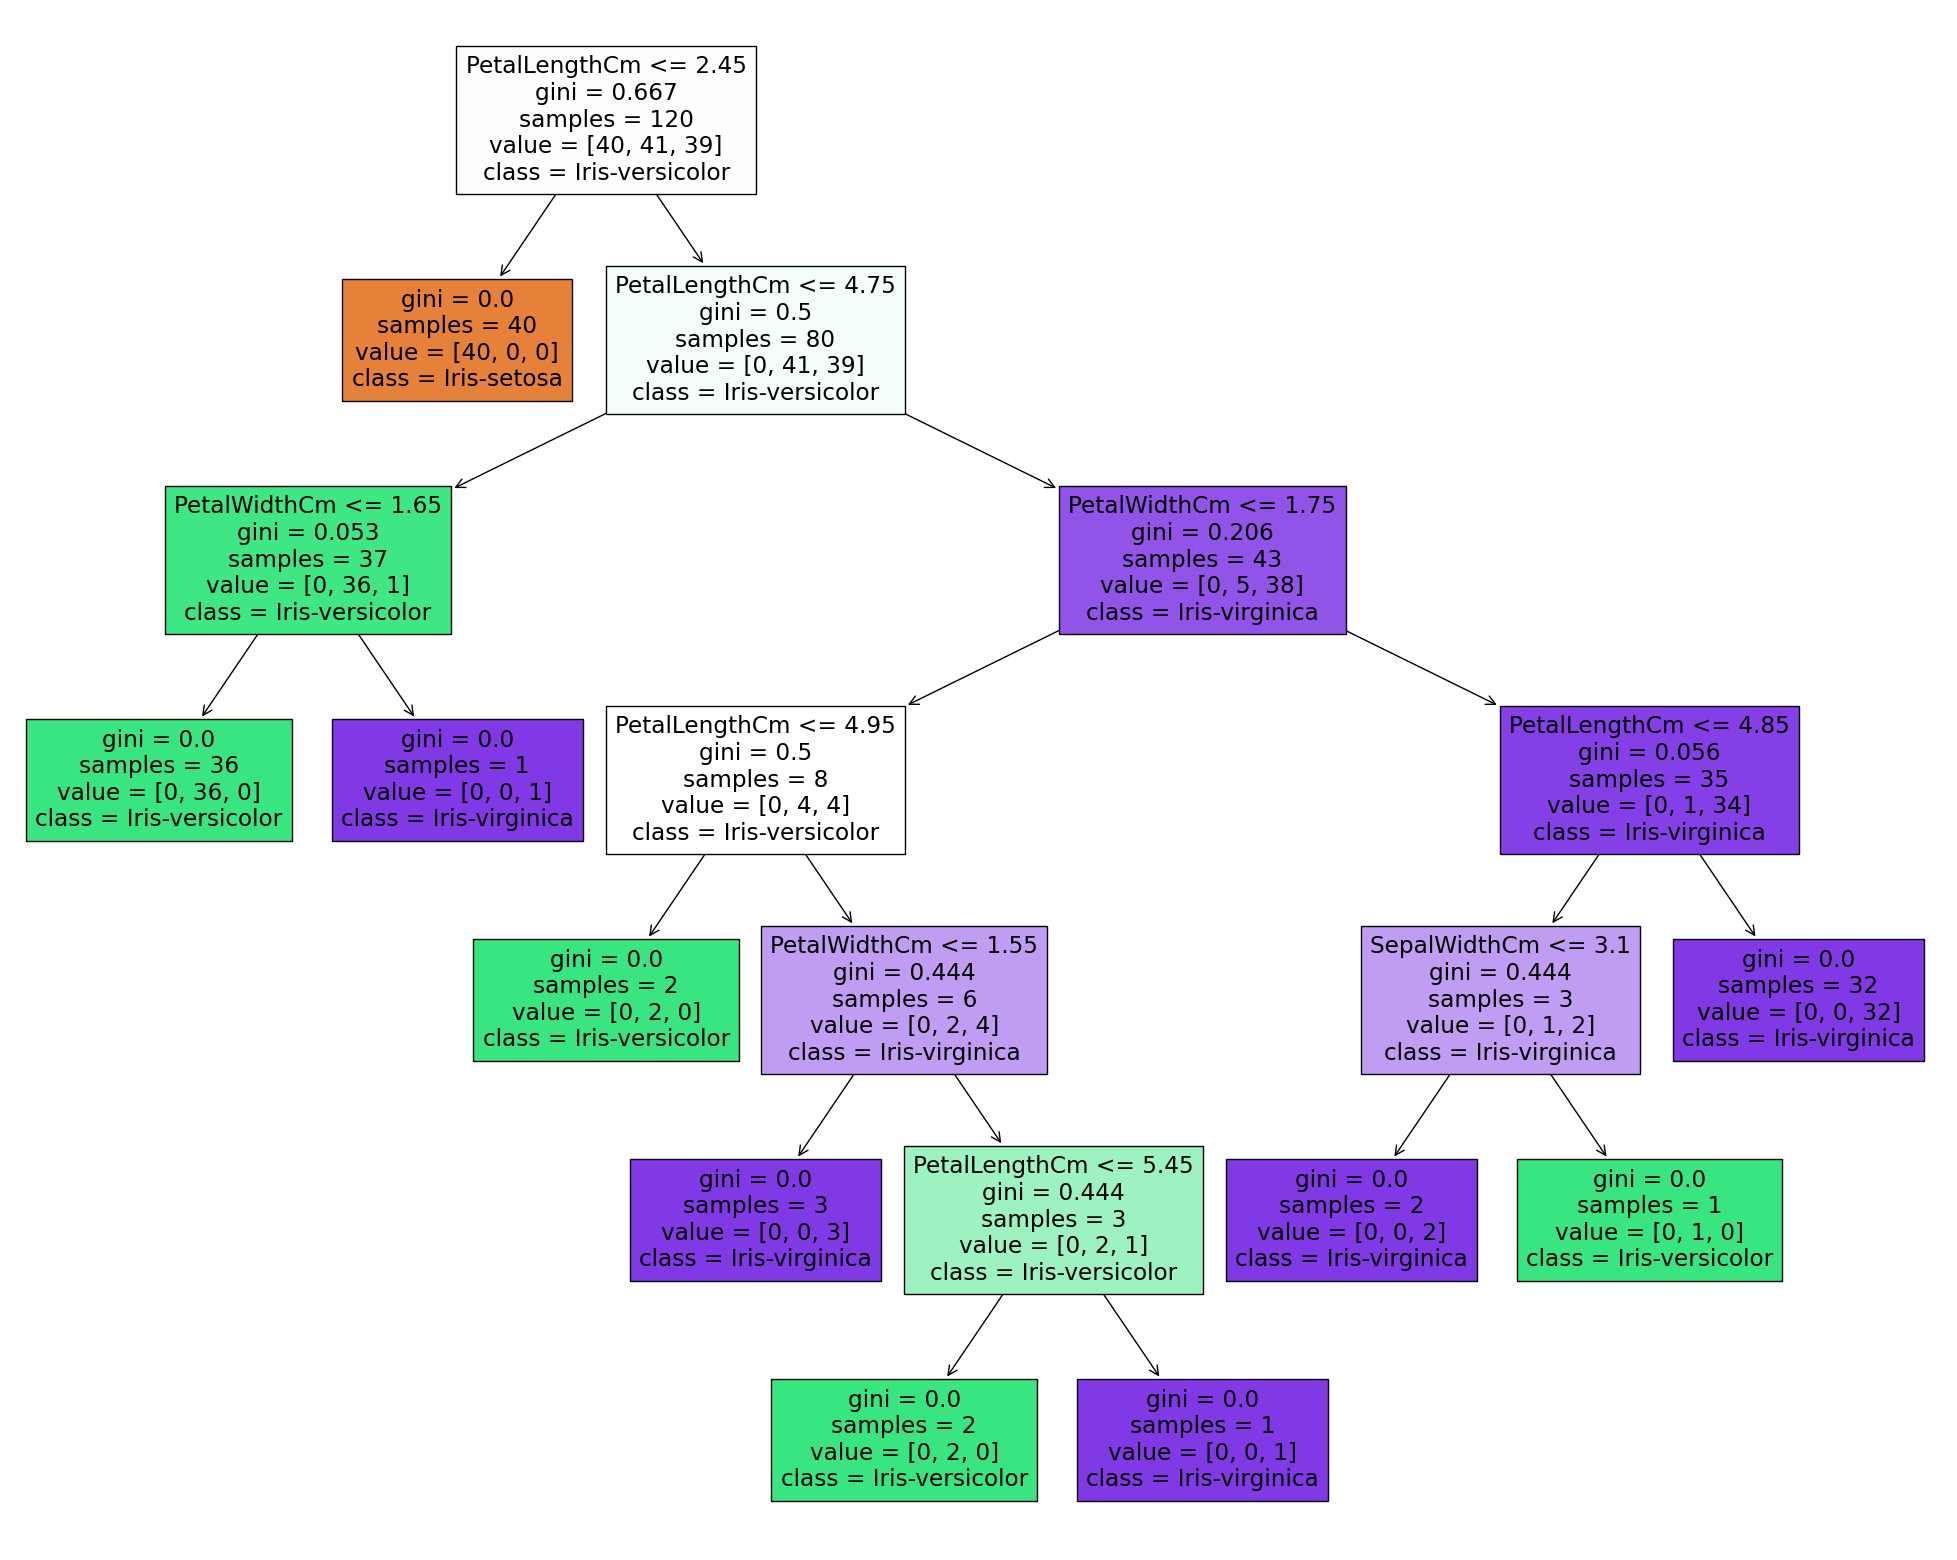

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)


In [103]:
gameplay_df = pd.DataFrame({
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain",
               "Rain", "Overcast", "Sunny", "Sunny", "Rain",
               "Sunny", "Overcast", "Overcast", "Rain", 
               "Sunny", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool",
                   "Cool", "Cool", "Mild", "Cool", "Mild",
                   "Mild", "Mild", "Hot", "Mild",
                   "Hot", "Mild", "Cool"],
    "Humidity": ["High", "High", "High", "High", "Normal",
                "Normal", "Normal", "High", "Normal", "Normal",
                "Normal", "High", "Normal", "High",
                "Normal", "High", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak",
            "Strong", "Strong", "Weak", "Weak", "Weak",
            "Strong", "Strong", "Weak", "Strong", 
            "Strong", "Weak", "Strong"],
    "Play" : ["No", "No", "Yes", "Yes", "Yes",
             "No", "Yes", "No", "Yes", "Yes",
             "Yes", "Yes", "Yes", "No",
             "Yes", "Yes", "No"]
})

In [104]:
gameplay_df = gameplay_df.reset_index()
gameplay_df.head()

,index,Outlook,Temperature,Humidity,Wind,Play
0,0,Sunny,Hot,High,Weak,No
1,1,Sunny,Hot,High,Strong,No
2,2,Overcast,Hot,High,Weak,Yes
3,3,Rain,Mild,High,Weak,Yes
4,4,Rain,Cool,Normal,Weak,Yes


In [105]:
outlook_df = pd.get_dummies(gameplay_df['Outlook'])
temperature_df = pd.get_dummies(gameplay_df['Temperature'])

In [106]:
outlook_df.drop('Sunny', axis = 1, inplace = True)
outlook_df = outlook_df.reset_index()
temperature_df.drop('Mild', axis = 1, inplace = True)
temperature_df = temperature_df.reset_index()

In [107]:
gameplay_df = pd.merge(gameplay_df, outlook_df, on = "index", how = "inner")
gameplay_df = pd.merge(gameplay_df, temperature_df, on = "index", how = "inner")
gameplay_df.head()

,index,Outlook,Temperature,Humidity,Wind,Play,Overcast,Rain,Cool,Hot
0,0,Sunny,Hot,High,Weak,No,0,0,0,1
1,1,Sunny,Hot,High,Strong,No,0,0,0,1
2,2,Overcast,Hot,High,Weak,Yes,1,0,0,1
3,3,Rain,Mild,High,Weak,Yes,0,1,0,0
4,4,Rain,Cool,Normal,Weak,Yes,0,1,1,0


In [108]:
gameplay_df= gameplay_df.replace({"Humidity": {"Normal": 0, "High": 1},
                                 "Wind": {"Weak": 0, "Strong": 1}})
gameplay_df.head()

,index,Outlook,Temperature,Humidity,Wind,Play,Overcast,Rain,Cool,Hot
0,0,Sunny,Hot,1,0,No,0,0,0,1
1,1,Sunny,Hot,1,1,No,0,0,0,1
2,2,Overcast,Hot,1,0,Yes,1,0,0,1
3,3,Rain,Mild,1,0,Yes,0,1,0,0
4,4,Rain,Cool,0,0,Yes,0,1,1,0


In [109]:
X = gameplay_df[['Overcast', "Rain", "Cool", "Hot", "Humidity", "Wind"]]
y = gameplay_df['Play']

In [114]:
X_train = X[:14]
X_test = X[14:]
y_train = y[:14]
y_test = y[14:]

In [115]:
X_train.shape

(14, 6)

In [116]:
X_train

,Overcast,Rain,Cool,Hot,Humidity,Wind
0,0,0,0,1,1,0
1,0,0,0,1,1,1
2,1,0,0,1,1,0
3,0,1,0,0,1,0
4,0,1,1,0,0,0
5,0,1,1,0,0,1
6,1,0,1,0,0,1
7,0,0,0,0,1,0
8,0,0,1,0,0,0
9,0,1,0,0,0,0


In [117]:
clf = DecisionTreeClassifier()

In [118]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [119]:
features = list(X_train.columns)
target = np.unique(y_test)

In [120]:
features

['Overcast', 'Rain', 'Cool', 'Hot', 'Humidity', 'Wind']

In [121]:
target

array(['No', 'Yes'], dtype=object)

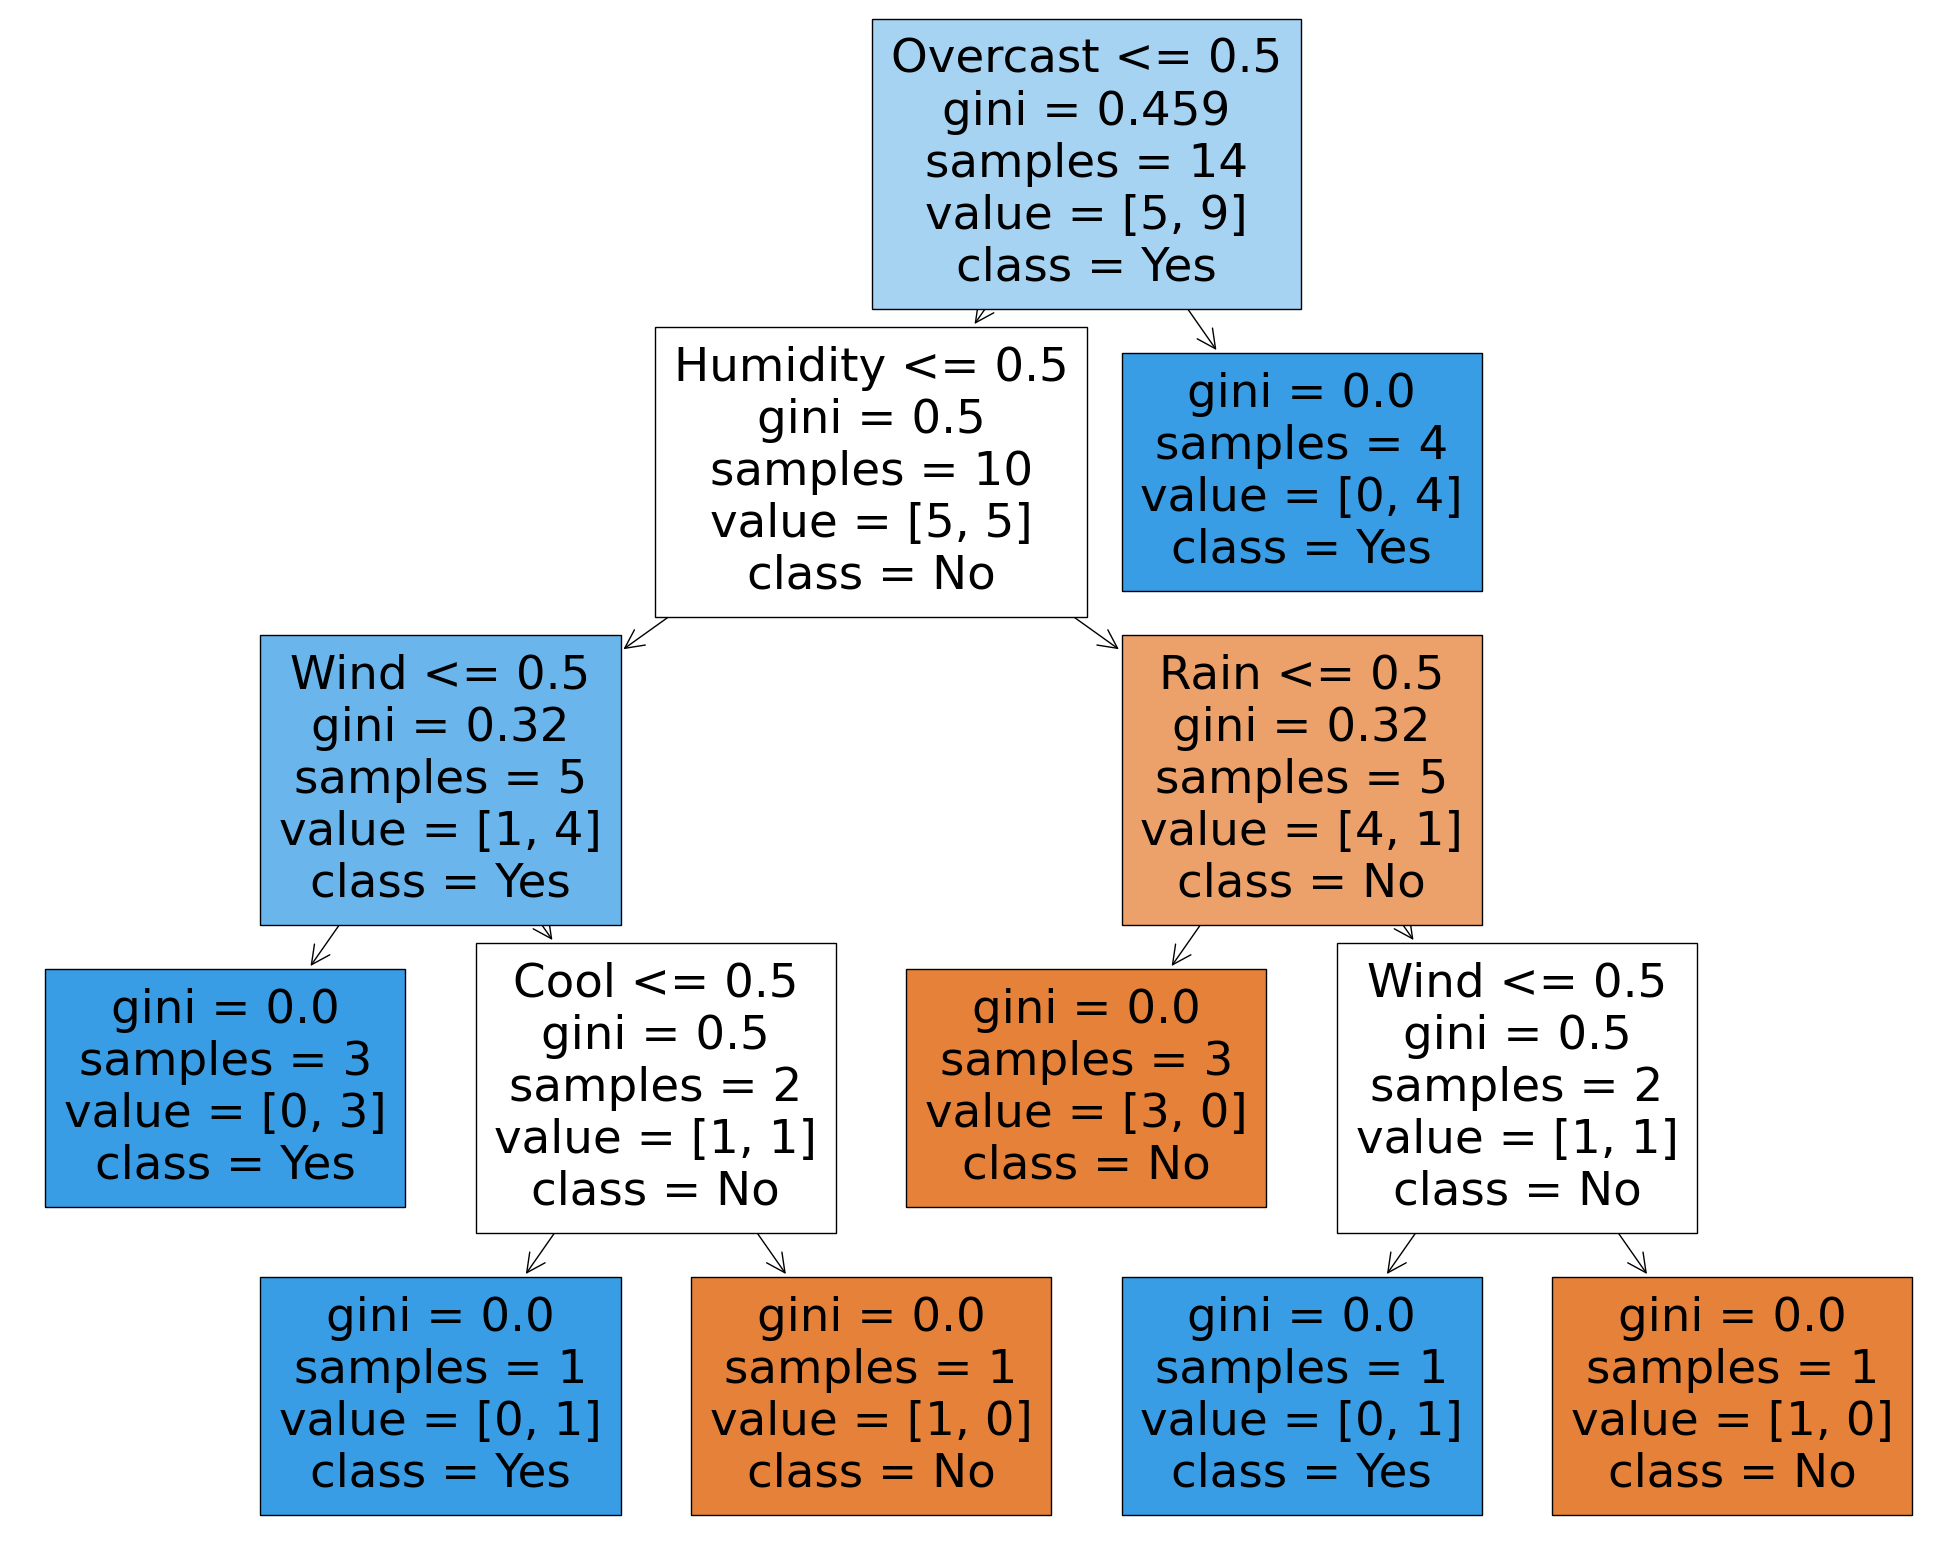

In [122]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)
